<a href="https://colab.research.google.com/github/helHg/dt-nids-evasion-attacks/blob/Juan-Diego/Evasion_Attack_on_Benign_Samples_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Baseline Experiment 1: Training Decision Tree Classifier: Model owner: https://github.com/tamerthamoqa/cic-ids-2018-intrusion-detection-classification

Using Grid Search with 5-fold Cross-Validation, with a 70/30 train/test split.

In [1]:
!pip install scikit-learn==1.0.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 21.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.27.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.0.2 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import graphviz
import pydotplus
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
#plot_confusion_matrix
from sklearn import tree

# For reproducible results
RANDOM_STATE_SEED = 420



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_dataset = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/CIC-IDS-2018-Dataset/processed_friday_dataset.csv")

In [5]:
df_dataset

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Protocol_17,Protocol_6,Label
0,141385,9,7,553,3773.0,202,0,61.444444,87.534438,1460,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,0
1,281,2,1,38,0.0,38,0,19.000000,26.870058,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,0
2,279824,11,15,1086,10527.0,385,0,98.727273,129.392497,1460,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,0
3,132,2,0,0,0.0,0,0,0.000000,0.000000,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,0
4,274016,9,13,1285,6141.0,517,0,142.777778,183.887722,1460,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1364426,25,1,1,0,0.0,0,0,0.000000,0.000000,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,1
1364427,37,1,1,0,0.0,0,0,0.000000,0.000000,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,1
1364428,112640543,3,0,0,0.0,0,0,0.000000,0.000000,0,...,0.0,0.0,0.0,56300000.0,7.778175,56300000.0,56300000.0,0,0,0
1364429,41,1,1,0,0.0,0,0,0.000000,0.000000,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,1


In [6]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1364431 entries, 0 to 1364430
Data columns (total 73 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Flow Duration      1364431 non-null  int64  
 1   Tot Fwd Pkts       1364431 non-null  int64  
 2   Tot Bwd Pkts       1364431 non-null  int64  
 3   TotLen Fwd Pkts    1364431 non-null  int64  
 4   TotLen Bwd Pkts    1364431 non-null  float64
 5   Fwd Pkt Len Max    1364431 non-null  int64  
 6   Fwd Pkt Len Min    1364431 non-null  int64  
 7   Fwd Pkt Len Mean   1364431 non-null  float64
 8   Fwd Pkt Len Std    1364431 non-null  float64
 9   Bwd Pkt Len Max    1364431 non-null  int64  
 10  Bwd Pkt Len Min    1364431 non-null  int64  
 11  Bwd Pkt Len Mean   1364431 non-null  float64
 12  Bwd Pkt Len Std    1364431 non-null  float64
 13  Flow IAT Mean      1364431 non-null  float64
 14  Flow IAT Std       1364431 non-null  float64
 15  Flow IAT Max       1364431 non-n

### 1- Making an 70/30 train/test split

In [7]:
train, test = train_test_split(df_dataset, test_size=0.3, random_state=RANDOM_STATE_SEED)

In [8]:
train

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Protocol_17,Protocol_6,Label
358501,1932,1,1,34,211.0,34,34,34.000000,0.000000,211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
205523,10230,3,4,326,129.0,326,0,108.666667,188.216188,112,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
334013,29643,1,1,32,121.0,32,32,32.000000,0.000000,121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
1244653,94265,3,0,0,0.0,0,0,0.000000,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
1309914,60062,3,0,0,0.0,0,0,0.000000,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049785,4611411,4,5,935,374.0,935,0,233.750000,467.500000,374,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
178094,11867,3,4,326,129.0,326,0,108.666667,188.216188,112,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
510579,541109,6,5,455,338.0,140,0,75.833333,62.936211,145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
1242184,3404233,5,3,935,322.0,935,0,187.000000,418.144712,322,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0


In [9]:
test
#test.to_csv("/content/drive/MyDrive/Colab_Notebooks/test.csv", index=False)

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Protocol_17,Protocol_6,Label
421031,5856314,4,4,97,231.0,97,0,24.25,48.500000,231,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
1026751,4442833,5,3,935,348.0,935,0,187.00,418.144712,348,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
882513,67116,3,0,0,0.0,0,0,0.00,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
413896,2681,1,1,34,155.0,34,34,34.00,0.000000,155,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
189064,1391793,8,7,1132,1581.0,661,0,141.50,222.792023,1173,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341771,4975198,2,0,0,0.0,0,0,0.00,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
1281286,4383470,5,4,935,668.0,935,0,187.00,418.144712,334,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
606144,15125,2,1,0,0.0,0,0,0.00,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
188978,1685281,8,7,1144,1581.0,677,0,143.00,227.969923,1173,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0


#### MinMax Scaling of numerical attributes based on train set

In [10]:
numerical_cols = df_dataset.columns[:-3]
numerical_cols

Index(['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts',
       'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max',
       'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Len', 'Bwd Header Len',
       'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max',
       'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt',
       'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt',
       'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio',
       'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
       'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg',
       'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'B

In [11]:
min_max_scaler = MinMaxScaler().fit(train[numerical_cols])

In [12]:
train[numerical_cols] = min_max_scaler.transform(train[numerical_cols])

In [13]:
train

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Protocol_17,Protocol_6,Label
358501,0.000016,0.000000,0.000014,0.000031,0.000002,0.011676,0.023288,0.023288,0.000000,0.024286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
205523,0.000085,0.000046,0.000058,0.000296,0.000001,0.111951,0.000000,0.074429,0.182314,0.012891,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
334013,0.000247,0.000000,0.000014,0.000029,0.000001,0.010989,0.021918,0.021918,0.000000,0.013927,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
1244653,0.000786,0.000046,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
1309914,0.000501,0.000046,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049785,0.038428,0.000070,0.000072,0.000850,0.000004,0.321085,0.000000,0.160103,0.452839,0.043048,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
178094,0.000099,0.000046,0.000058,0.000296,0.000001,0.111951,0.000000,0.074429,0.182314,0.012891,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
510579,0.004509,0.000116,0.000072,0.000413,0.000003,0.048077,0.000000,0.051941,0.060962,0.016690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
1242184,0.028369,0.000093,0.000043,0.000850,0.000003,0.321085,0.000000,0.128082,0.405031,0.037063,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0


In [14]:
test[numerical_cols] = min_max_scaler.transform(test[numerical_cols])

In [15]:

test

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Protocol_17,Protocol_6,Label
421031,0.048803,0.000070,0.000058,0.000088,0.000002,0.033310,0.000000,0.016610,0.046979,0.026588,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
1026751,0.037024,0.000093,0.000043,0.000850,0.000003,0.321085,0.000000,0.128082,0.405031,0.040055,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
882513,0.000559,0.000046,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
413896,0.000022,0.000000,0.000014,0.000031,0.000002,0.011676,0.023288,0.023288,0.000000,0.017841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
189064,0.011598,0.000162,0.000101,0.001029,0.000016,0.226992,0.000000,0.096918,0.215805,0.135014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341771,0.041460,0.000023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
1281286,0.036529,0.000093,0.000058,0.000850,0.000007,0.321085,0.000000,0.128082,0.405031,0.038444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
606144,0.000126,0.000023,0.000014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
188978,0.014044,0.000162,0.000101,0.001039,0.000016,0.232486,0.000000,0.097945,0.220821,0.135014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0


### 2- Checking label distribution

In [16]:
print("Full dataset:\n")
print("Benign: " + str(df_dataset["Label"].value_counts()[[0]].sum()))
print("Malicious: " + str(df_dataset["Label"].value_counts()[[1]].sum()))
print("---------------")

print("Training set:\n")
print("Benign: " + str(train["Label"].value_counts()[[0]].sum()))
print("Malicious: " + str(train["Label"].value_counts()[[1]].sum()))
print("---------------")

print("Test set:\n")
print("Benign: " + str(test["Label"].value_counts()[[0]].sum()))
print("Malicious: " + str(test["Label"].value_counts()[[1]].sum()))

Full dataset:

Benign: 1074342
Malicious: 290089
---------------
Training set:

Benign: 751849
Malicious: 203252
---------------
Test set:

Benign: 322493
Malicious: 86837


### 3- Splitting to X_train, y_train, X_test, y_test

In [17]:
y_train = np.array(train.pop("Label")) # pop removes "Label" from the dataframe
X_train = train.values

print(type(X_train))
print(type(y_train))
print(X_train.shape)
print(y_train.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(955101, 72)
(955101,)


In [18]:
y_test = np.array(test.pop("Label")) # pop removes "Label" from the dataframe
X_test = test.values

print(type(X_test))
print(type(y_test))
print(X_test.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(409330, 72)
(409330,)


### 8- Testing loading model

In [19]:
model = joblib.load("/content/drive/MyDrive/Colab_Notebooks/decision-tree-classifier.pkl")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [20]:
model

DecisionTreeClassifier(max_depth=12)

### 4 - Evasion Attack and prediction testing


In [42]:
test_1 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/test_benign.csv')
print(test_1.shape)  # Print the shape of the DataFrame

(322493, 73)


In [43]:
test_1[numerical_cols] = min_max_scaler.transform(test_1[numerical_cols])

In [27]:
#test_1['Bwd Seg Size Avg'] = test_1['Bwd Seg Size Avg'] * 0.16

In [37]:
variable = test_1['Bwd Pkts/s']

min_value = variable.min()
max_value = variable.max()
avg_value = variable.mean()


print(f"Minimum: {min_value}")
print(f"Maximum: {max_value}")
print(f"Average: {avg_value}")

Minimum: 0.0
Maximum: 5e-07
Average: 2.164078122709094e-10


In [44]:
y_test = np.array(test_1.pop("Label")) # pop removes "Label" from the dataframe
#y_test = np.array(test_1)
X_test = test_1.values

print(type(X_test))
print(type(y_test))
print(X_test.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(322493, 72)
(322493,)


In [45]:
test_1

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Protocol_17,Protocol_6
0,0.048803,0.000070,0.000058,0.000088,0.000002,0.033310,0.000000,0.016610,0.046979,0.026588,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
1,0.037024,0.000093,0.000043,0.000850,0.000003,0.321085,0.000000,0.128082,0.405031,0.040055,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
2,0.000022,0.000000,0.000014,0.000031,0.000002,0.011676,0.023288,0.023288,0.000000,0.017841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3,0.011598,0.000162,0.000101,0.001029,0.000016,0.226992,0.000000,0.096918,0.215805,0.135014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
4,0.016840,0.000162,0.000101,0.001029,0.000016,0.226992,0.000000,0.096918,0.215805,0.135014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322488,0.041460,0.000023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
322489,0.036529,0.000093,0.000058,0.000850,0.000007,0.321085,0.000000,0.128082,0.405031,0.038444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
322490,0.000126,0.000023,0.000014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
322491,0.014044,0.000162,0.000101,0.001039,0.000016,0.232486,0.000000,0.097945,0.220821,0.135014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


In [46]:
import plotly.graph_objects as go

original_bwd_seg = test_1['Bwd Seg Size Avg'].copy()

# Define the range of multiplication factors
factors = np.arange(0.1, 1, 0.01)  # From 0.1 to 0.5 in steps of 0.05

# Store results
attack_counts = []

# Loop through each multiplication factor
for factor in factors:
    # Restore original values
    test_1['Bwd Seg Size Avg'] = original_bwd_seg * factor

    # Update X_test to reflect the modified DataFrame
    X_test = test_1.values

    # Get predictions
    predictions = model.predict(X_test)

    # Count the number of attacks (predictions == 1)
    count_1s = np.count_nonzero(predictions == 1)
    attack_counts.append(count_1s)

# Create an interactive Plotly figure
fig = go.Figure()

# Add line plot
fig.add_trace(go.Scatter(
    x=factors,
    y=attack_counts,
    mode='lines+markers',
    marker=dict(size=10, color='blue'),
    line=dict(width=2, color='blue'),
    name='Attack Count'
))

# Customize layout
fig.update_layout(
    title='Effect of Multiplication Factor on Predicted Attacks',
    xaxis_title='Multiplication Factor',
    yaxis_title='Number of Attacks',
    template='plotly_dark',
    font=dict(size=16),
    width=1000,  # Set larger width
    height=600   # Set larger height
)

# Show the interactive graph

fig.write_html("/content/drive/MyDrive/Colab_Notebooks/Bwd_Seg_Size_Avg_Behavior on atttacks.html")

fig.show()



In [47]:
predictions = model.predict(X_test)
count_1s = np.count_nonzero(predictions == 1)
count_0s = np.count_nonzero(predictions == 0)
print("Number of attacks: ", count_1s)
print("Number of benign: ", count_0s)
print(predictions)

Number of attacks:  55
Number of benign:  322438
[0 0 0 ... 0 0 0]


In [48]:
print(accuracy_score(y_test, predictions))

0.9998294536625602


In [49]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[322438     55]
 [     0      0]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



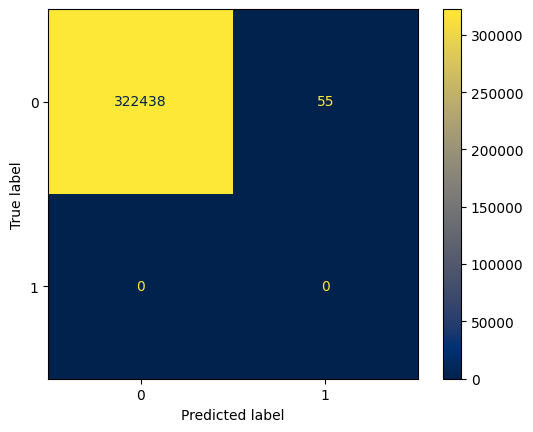

In [50]:
plot_confusion_matrix(model, X_test, y_test, cmap="cividis")